## Binary Classification with a Bank Churn Dataset: 
-   Predict whether a customer continues with their account or closes it (churns)
-   Evaluation is done using the AUC between the predicted probability and the observed target
-   Predict the probability for the target variable *Exited*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [75]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_train.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
cat_features = ['Surname', 'Geography', 'Gender']
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [7]:
#get the unique values of the columns 
df_train['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## An overview of the features: 
1. id: unique ids given to the data
2. CustomerId: Unique customer ids obtained from the bank 
3. Surname: surname of the holder 
4. CreditScore: prediction of one's credit behaviour, such as how likely you are to pay a loan back on time, based on info from one's credit reports
5. Geography: here represents the country of the individual: different countries will have different distribution of people churning their account or not 
6. Tenure: number of years the holder has their account for
7. Balance: The balance of their account
8. Age: age of the holder: someone in their later ages might not churn their account as someone who is older (an assumption)
9. NumOfProducts: represent the number of services a customer has with the bank more the number of services likely mean more are the chances of them staying 
10. HasCrCard: binary feature representing if the holder has a credit card or not 
11. IsActiveMember: binary feature representing if the holder is an active member or not 
12. EsimtatedSalary: Salary of the holder

In [8]:
#checking the null values 
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Looking at the unique values of the categorical variables

In [9]:
for feature in cat_features:
    print(f'{feature} has {df_train[feature].nunique()} unique values')

Surname has 2797 unique values
Geography has 3 unique values
Gender has 2 unique values


In [10]:
#remove surname from the cat_features
cat_features.remove('Surname')

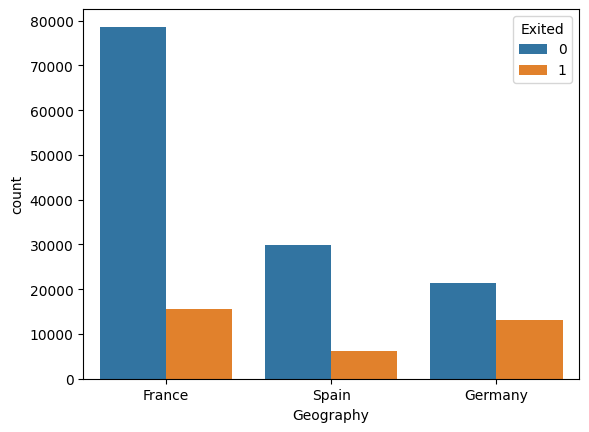

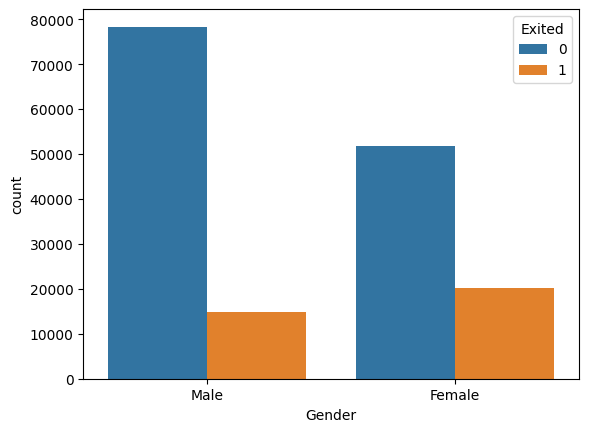

In [11]:
#plotting each cat feature to the target variable
for feature in cat_features:
    sns.countplot(x=feature, data=df_train, hue='Exited')
    plt.show()

### Investigating the relationship between credit score and customer churn

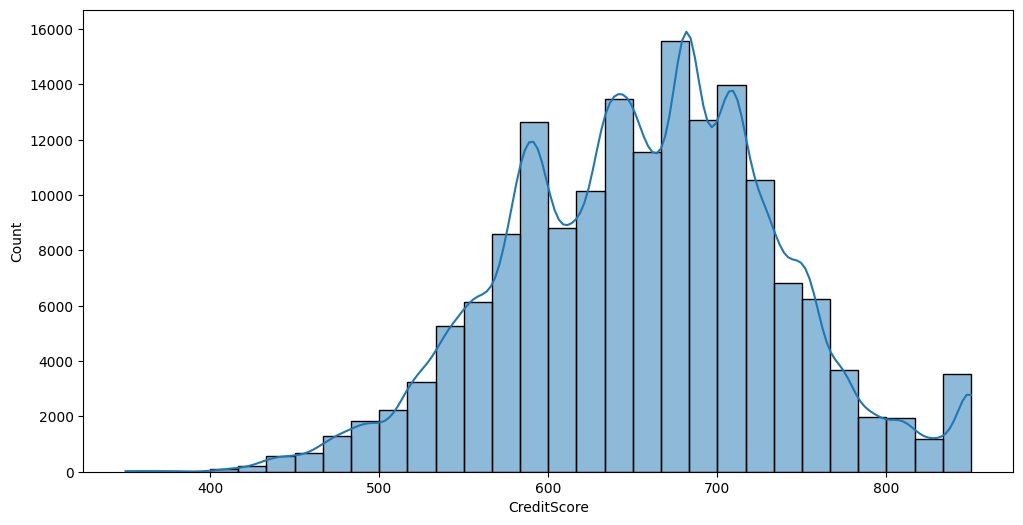

In [12]:
#plotting credit score
plt.figure(figsize=(12, 6))
sns.histplot(df_train['CreditScore'], kde=True, bins=30)
plt.show()

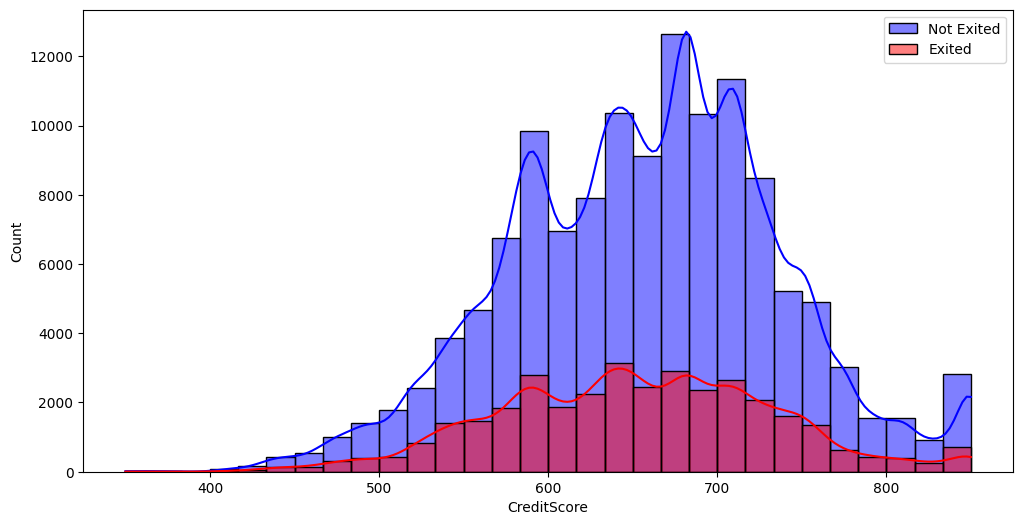

In [13]:
#comparing the credit score with the target variable
#group the exited and not exited customers and plot their credit scores
plt.figure(figsize=(12, 6))
sns.histplot(df_train[df_train['Exited'] == 0]['CreditScore'], kde=True, bins=30, color='blue', label='Not Exited')
sns.histplot(df_train[df_train['Exited'] == 1]['CreditScore'], kde=True, bins=30, color='red', label='Exited')
plt.legend()


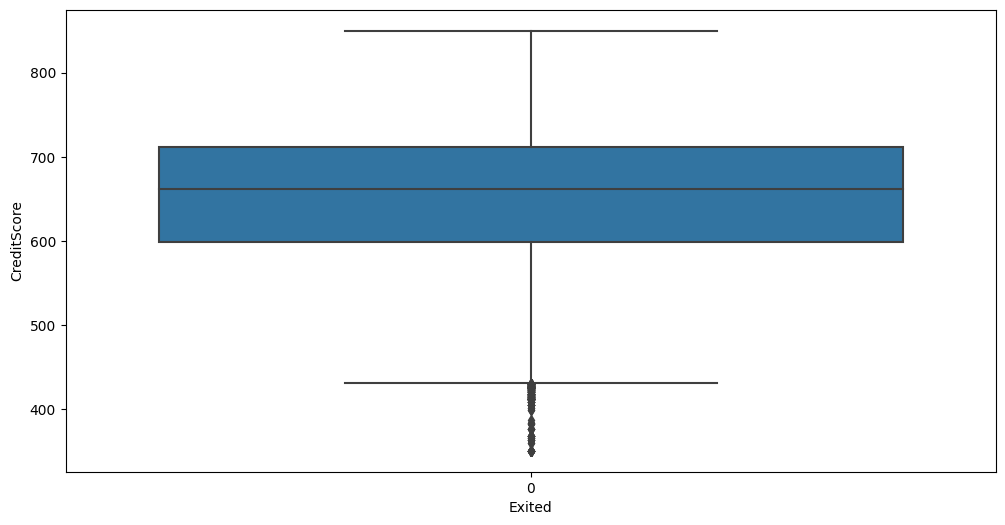

In [14]:
#creating boxplots after grouping the target variable by exited
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df_train[df_train['Exited']==0])
plt.show()

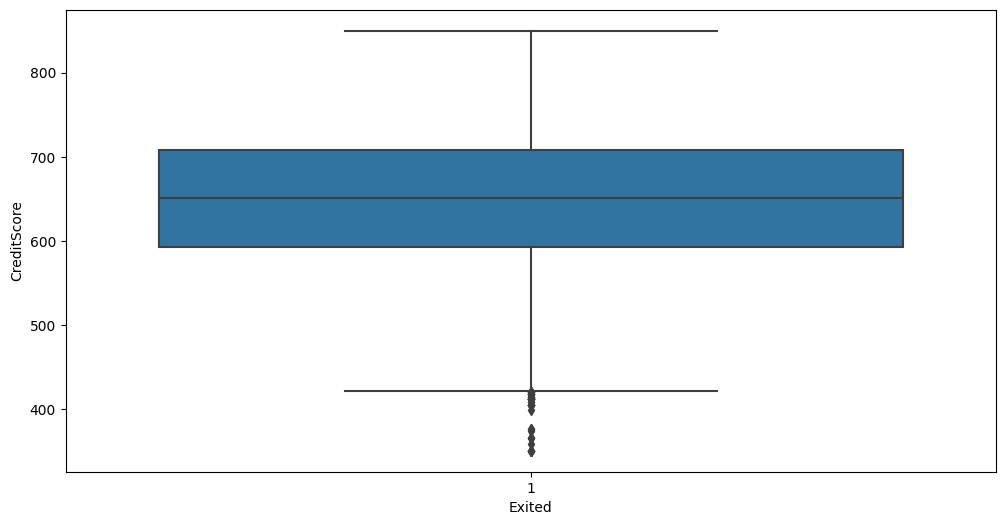

In [15]:
#creating boxplots after grouping the target variable by exited
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df_train[df_train['Exited']==1])
plt.show()

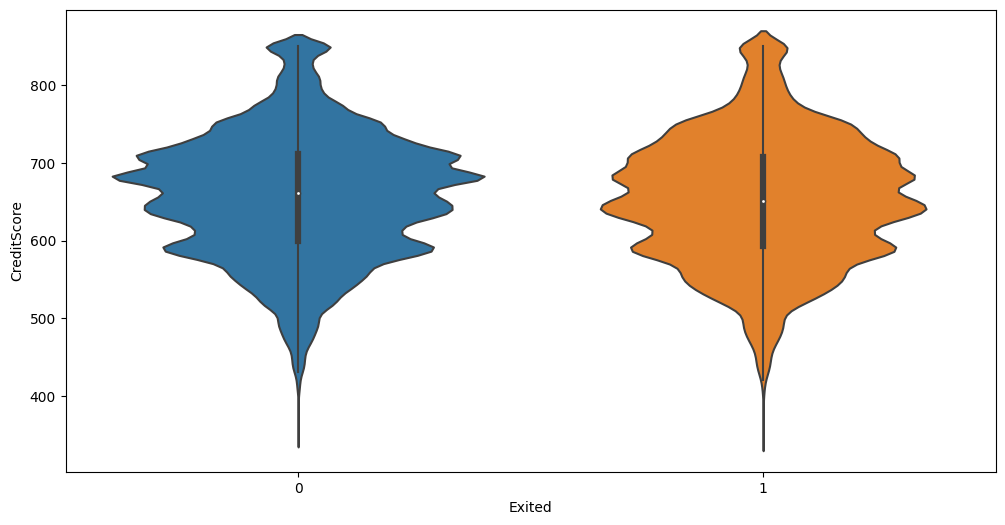

In [16]:
#creating violin plots after grouping exited and non exited customers
plt.figure(figsize=(12, 6))
sns.violinplot(x = 'Exited', y = 'CreditScore', data = df_train)
plt.show()

### investigating the relationship of countries and customer churn

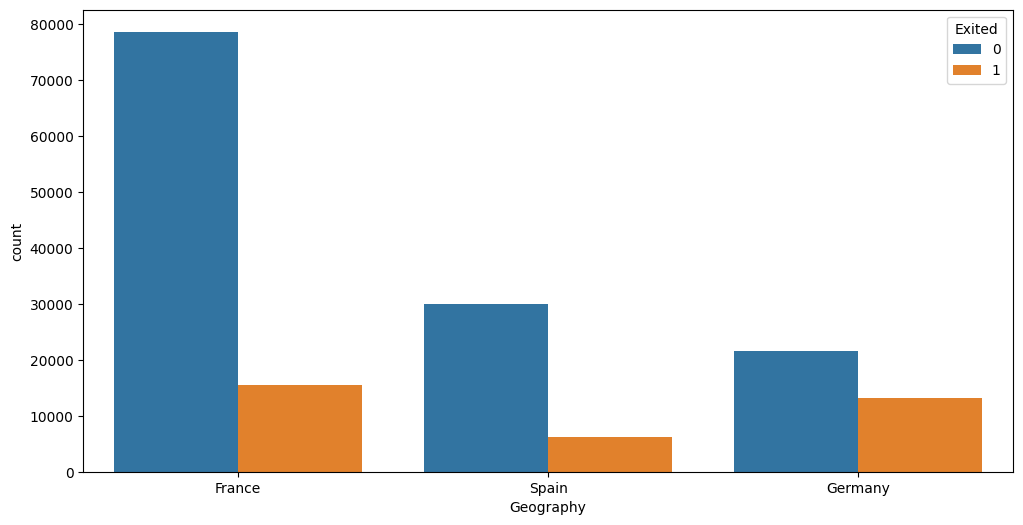

In [17]:
#plotting the geograph versus exited
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', data=df_train, hue='Exited')
plt.show()

In [18]:
#finding the percentage of customers that exited in each country
df_train.groupby('Geography')['Exited'].mean()*100

Geography
France     16.528154
Germany    37.895163
Spain      17.217574
Name: Exited, dtype: float64

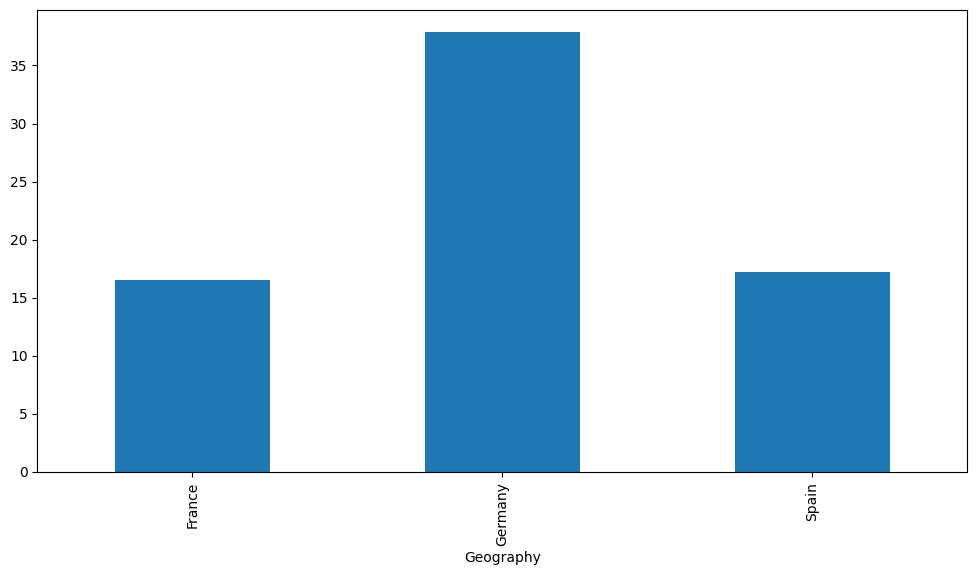

In [19]:
#plotting the percentage of customers that exited in each country
plt.figure(figsize=(12, 6))
(df_train.groupby('Geography')['Exited'].mean()*100).plot(kind='bar')
plt.show()

### Investigating tenure to customers churn

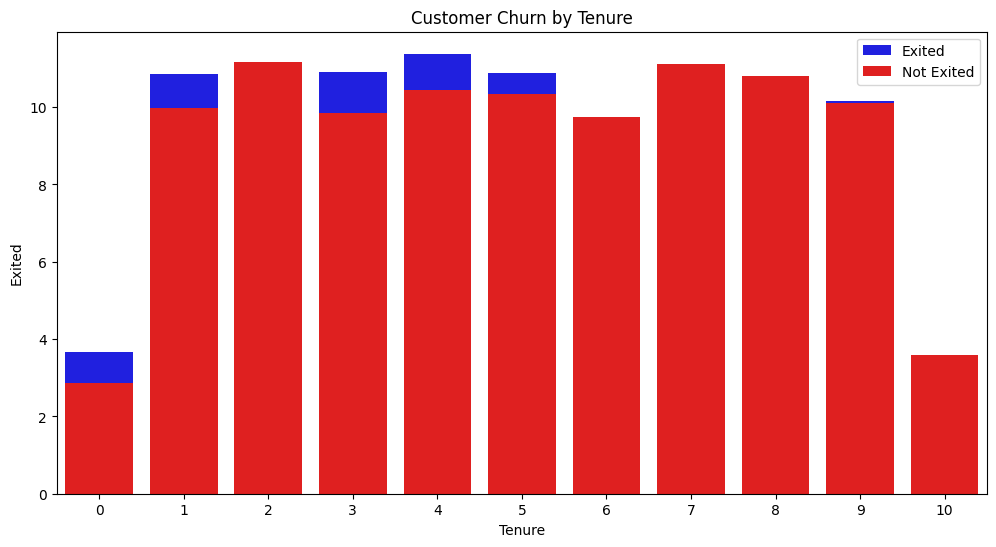

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

# calculate percentages
total_exited = len(df_train[df_train['Exited'] == 1])
total_not_exited = len(df_train[df_train['Exited'] == 0])

# plot for people who exited
sns.barplot(x='Tenure', y='Exited', data=df_train[df_train['Exited']==1], estimator=lambda x: len(x) / total_exited * 100, ax=ax, color='blue', label='Exited')

# plot for people who did not exit
sns.barplot(x='Tenure', y='Exited', data=df_train[df_train['Exited'] == 0], estimator=lambda x: len(x) / total_not_exited * 100, ax=ax, color='red', label='Not Exited')

ax.set_title('Customer Churn by Tenure')
ax.legend()

plt.show()


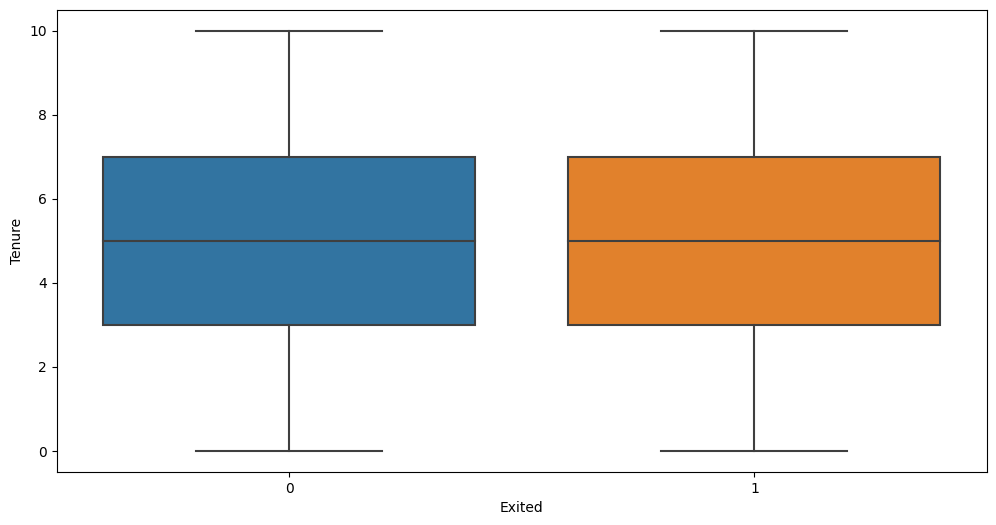

In [21]:
#creating box plots of the tenure versus exited
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Tenure', data=df_train)
plt.show()

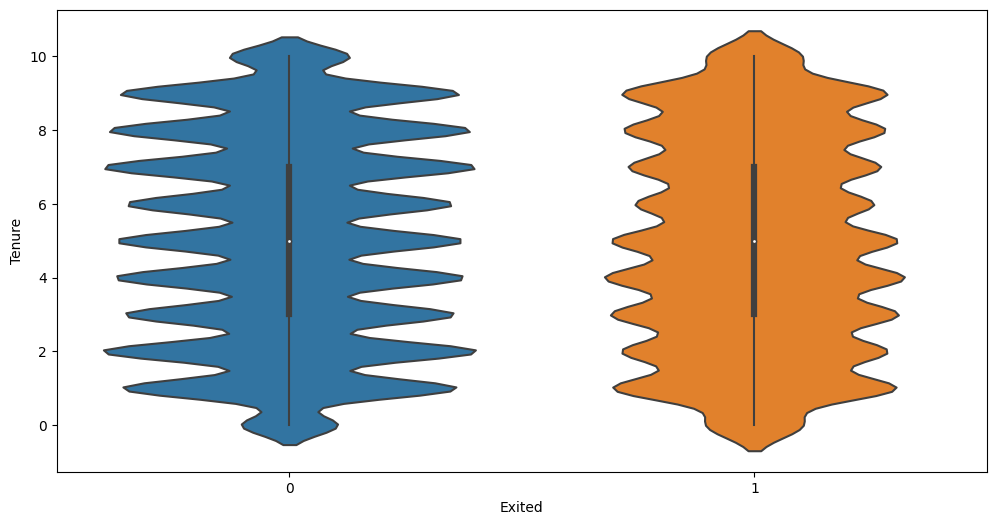

In [22]:
#creating violin plots of the tenure versus exited
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exited', y='Tenure', data=df_train)
plt.show()

### Investing customers churn to NumOfProducts

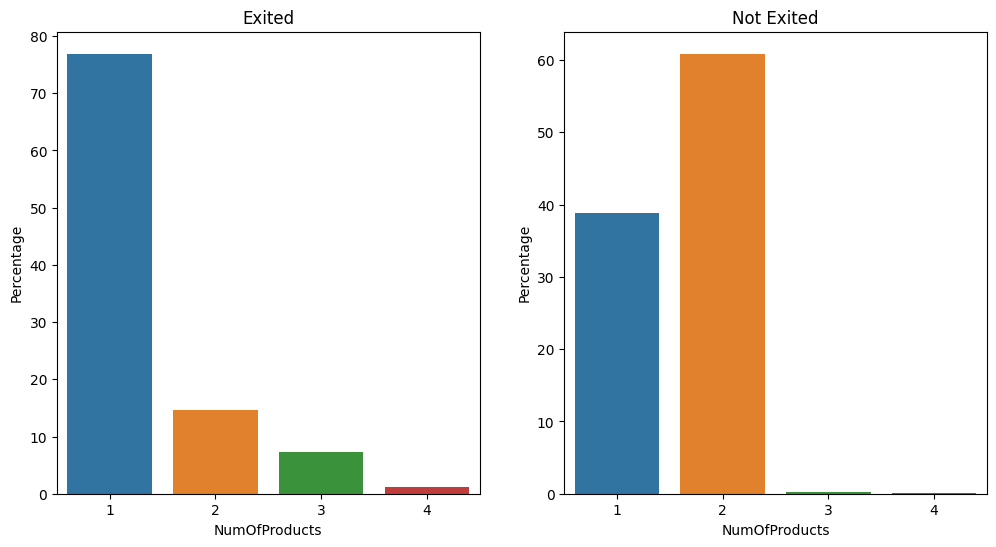

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Calculate percentages
total_exited = len(df_train[df_train['Exited'] == 1])
total_not_exited = len(df_train[df_train['Exited'] == 0])

# Plot for people who exited
sns.barplot(x='NumOfProducts', y='Exited', data=df_train[df_train['Exited'] == 1], estimator=lambda x: len(x) / total_exited * 100, ax=ax1)
ax1.set_title('Exited')
ax1.set_ylabel('Percentage')

# Plot for people who did not exit
sns.barplot(x='NumOfProducts', y='Exited', data=df_train[df_train['Exited'] == 0], estimator=lambda x: len(x) / total_not_exited * 100, ax=ax2)
ax2.set_title('Not Exited')
ax2.set_ylabel('Percentage')

plt.show()


### Investigating HasCrCard to customer chrun

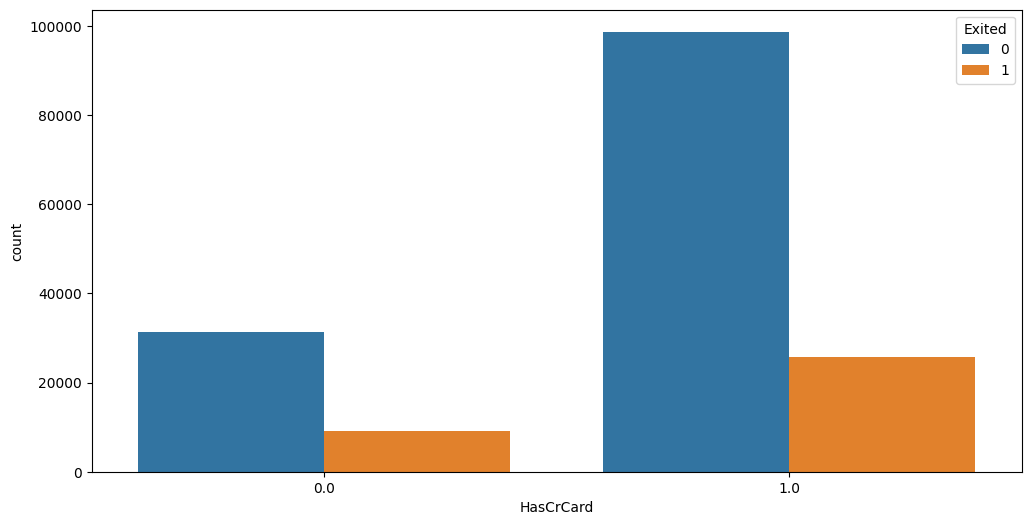

In [24]:
#plotting has credit card to customer churn 
#group the exited and not exited customers and plot their corresponding has creditcard
plt.figure(figsize=(12, 6))
sns.countplot(x='HasCrCard', data=df_train, hue='Exited')
plt.show()

In [25]:
#plotting the percentage of customers that exited and had credit card
df_train.groupby('HasCrCard')['Exited'].mean()*100

HasCrCard
0.0    22.742944
1.0    20.643264
Name: Exited, dtype: float64

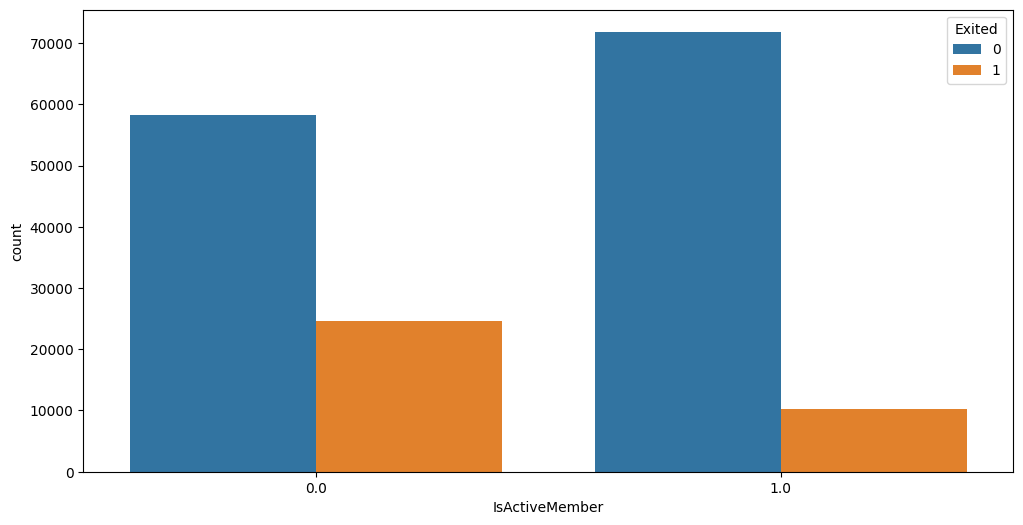

In [26]:
#Plotting isActiveMember to customer churn
#group the exited and not exited customers and plot their corresponding isActiveMember
plt.figure(figsize=(12, 6))
sns.countplot(x='IsActiveMember', data=df_train, hue='Exited')
plt.show()

In [27]:
#corresponding percentages for isActiveMember and exited
df_train.groupby('IsActiveMember')['Exited'].mean()*100

IsActiveMember
0.0    29.708632
1.0    12.534541
Name: Exited, dtype: float64

### Investigating the relationship between balance and exited

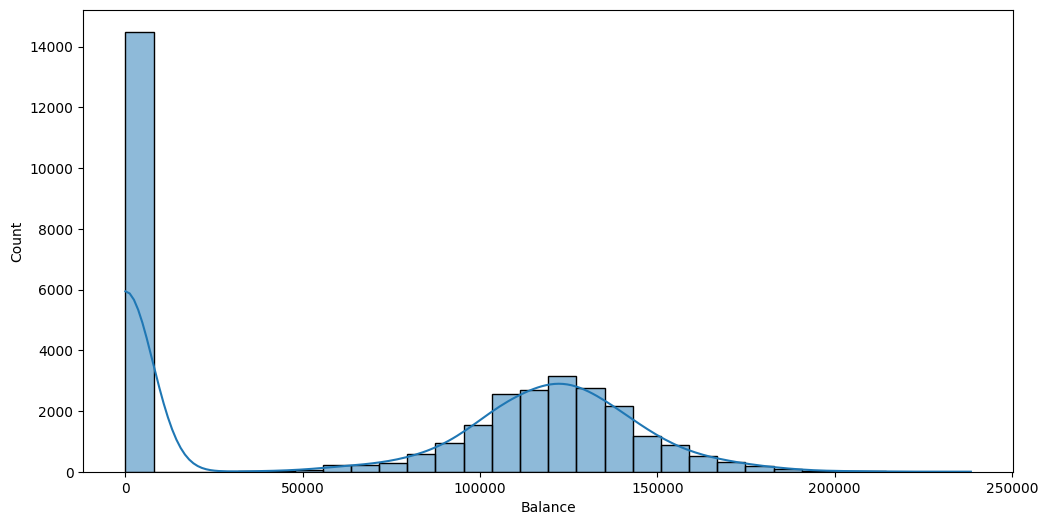

In [49]:
#plotting their balance versus customer churn
plt.figure(figsize=(12, 6))
sns.histplot(df_train[df_train['Exited'] == 1]['Balance'], kde=True, bins=30)
plt.show()

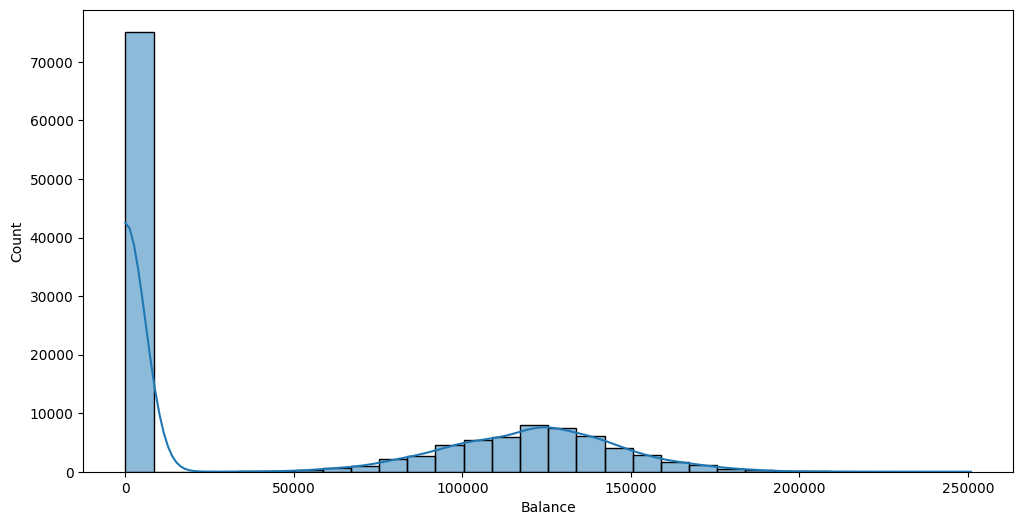

In [51]:
#plotting their balance versus customer churn
plt.figure(figsize=(12, 6))
sns.histplot(df_train[df_train['Exited'] == 0]['Balance'], kde=True, bins=30)
plt.show()

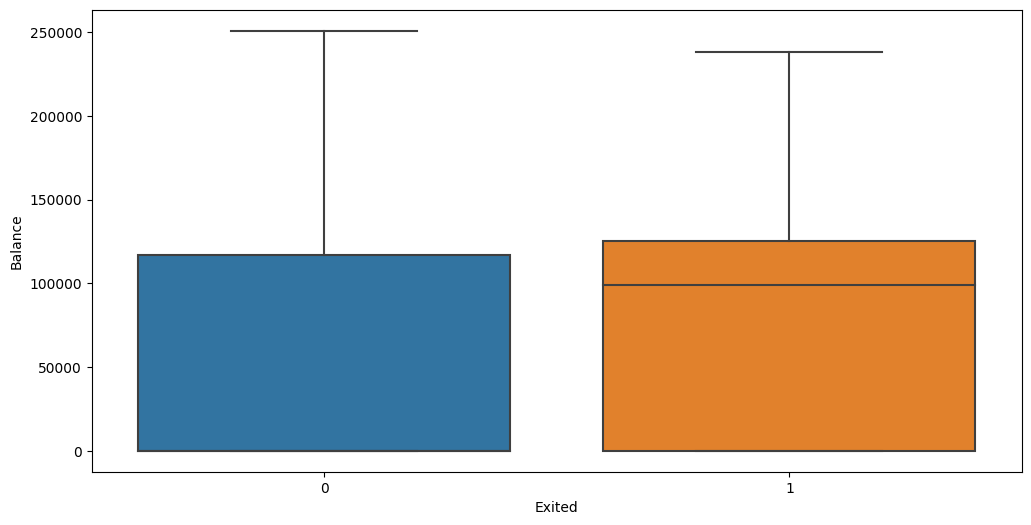

In [50]:
#plotting the balance versus exited
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Balance', data=df_train)
plt.show()

### Checking relationships between features

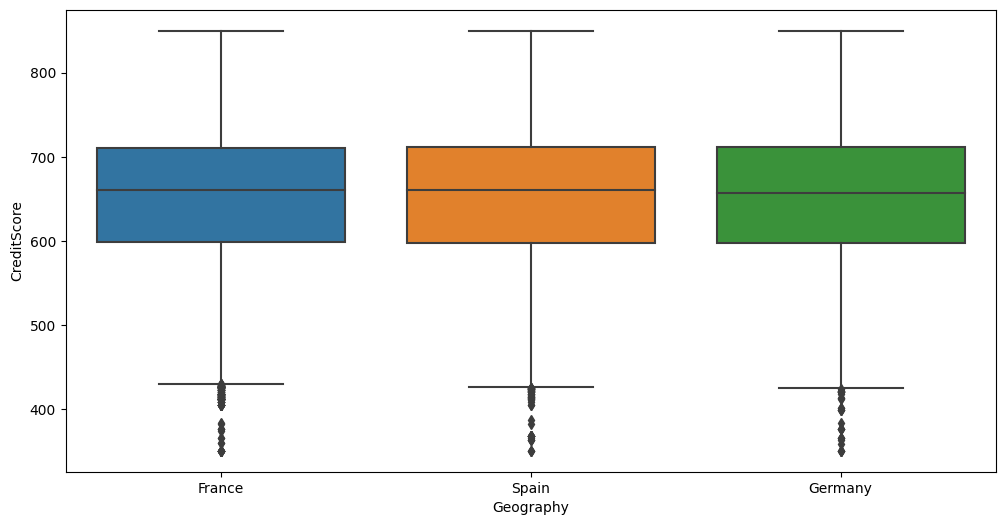

In [28]:
#plotting credit scores corresponding to geography 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geography', y='CreditScore', data=df_train)
plt.show()

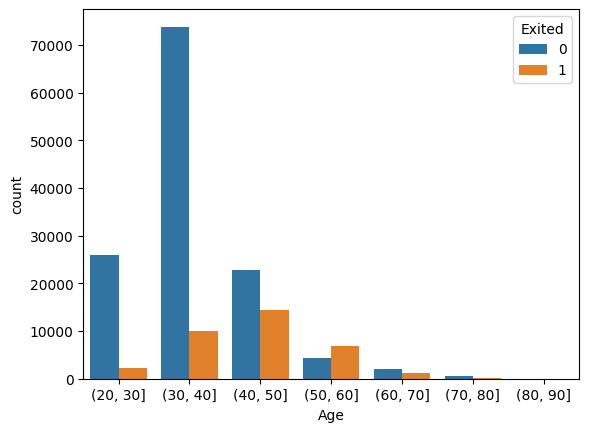

In [38]:
#investigating credit score w.r.t age, bin the age into 10 year intervals
df_AgeBin = pd.cut(df_train['Age'], bins=np.arange(20, 100, 10))
sns.countplot(x=df_AgeBin, data=df_train, hue='Exited')
plt.show()

In [42]:
#percentages of each bin that exited
df_train.groupby(df_AgeBin)['Exited'].mean()*100

Age
(20, 30]     8.262118
(30, 40]    12.038516
(40, 50]    38.813167
(50, 60]    60.858609
(60, 70]    35.238386
(70, 80]    14.693295
(80, 90]    15.625000
Name: Exited, dtype: float64

In [43]:
#Most of the exited are from the 50, 60 range in the age bin 

In [45]:
num_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

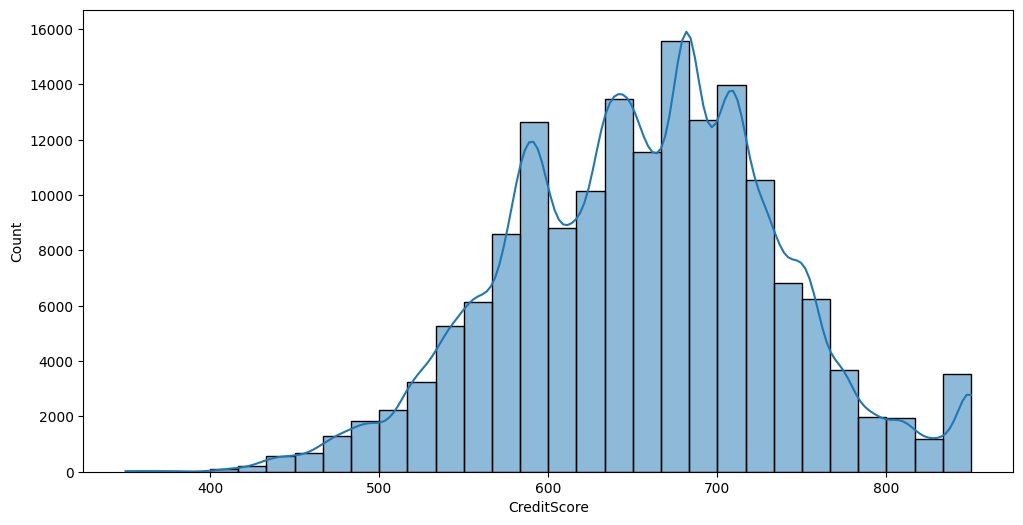

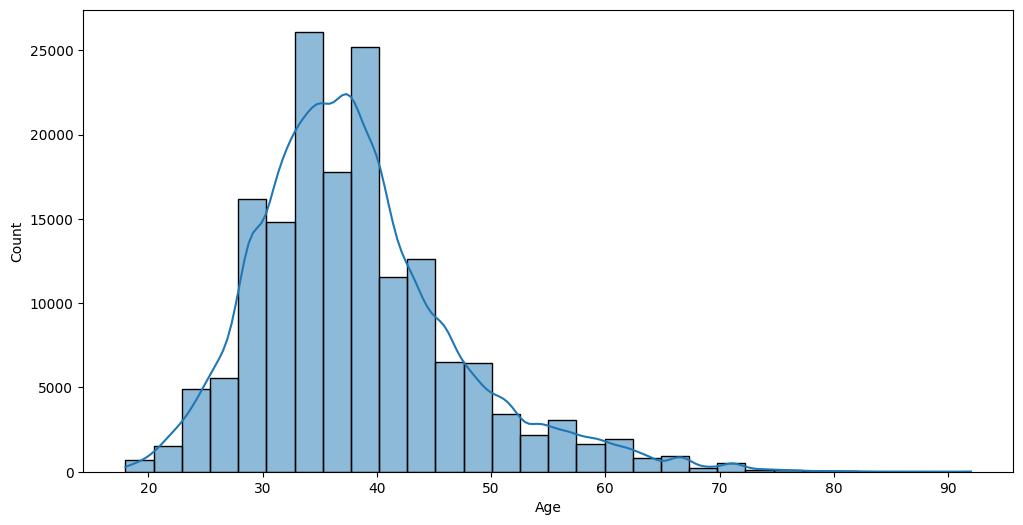

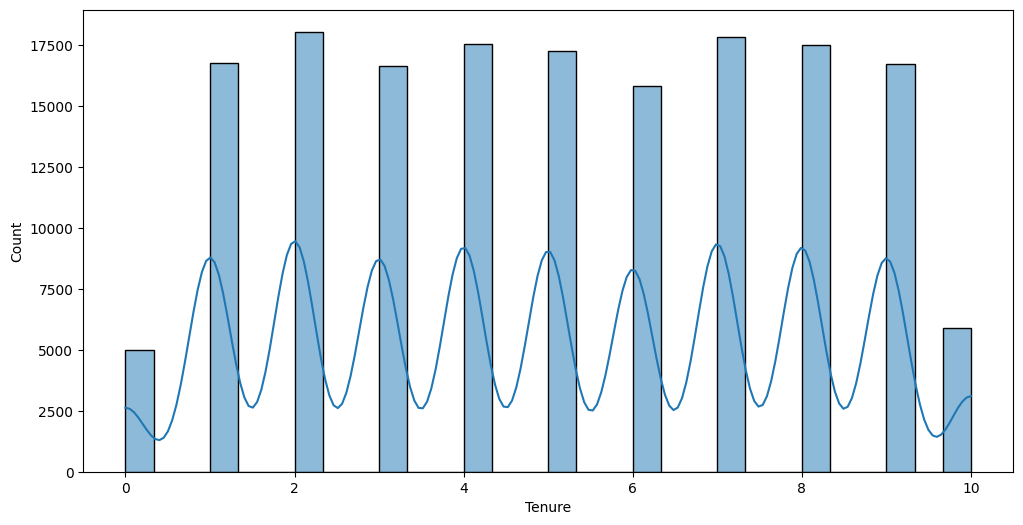

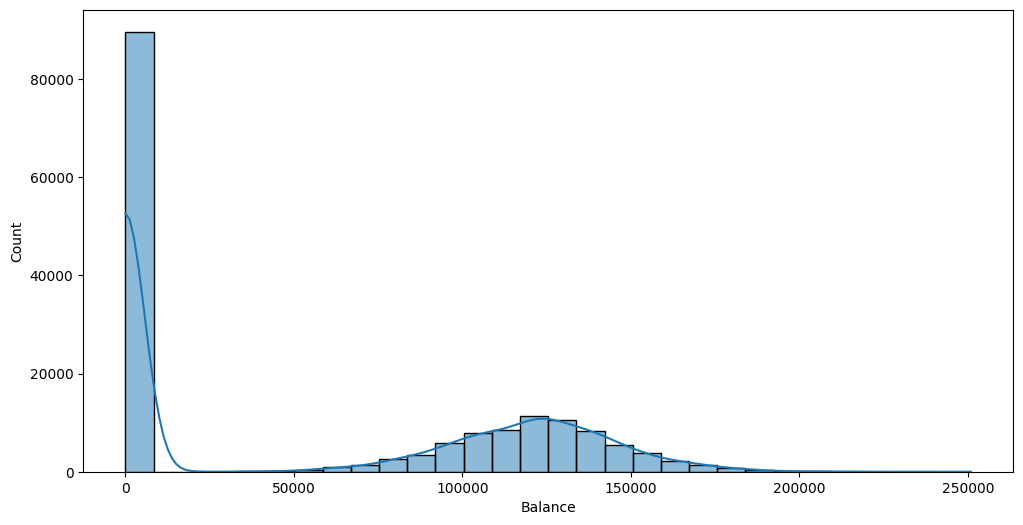

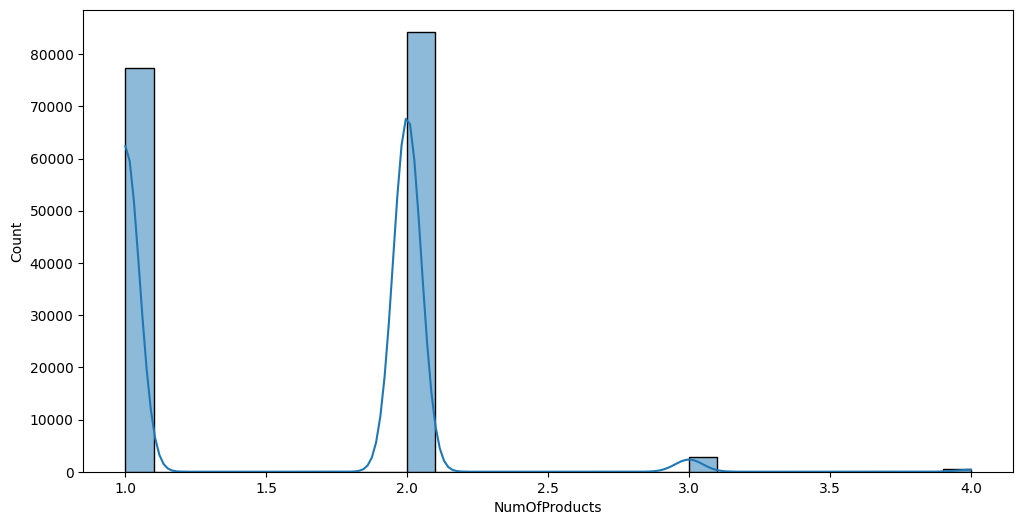

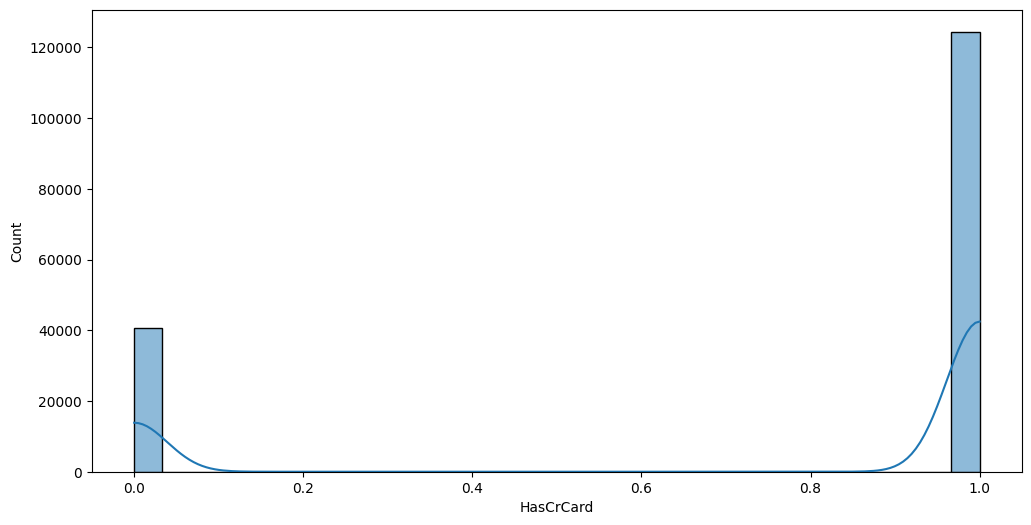

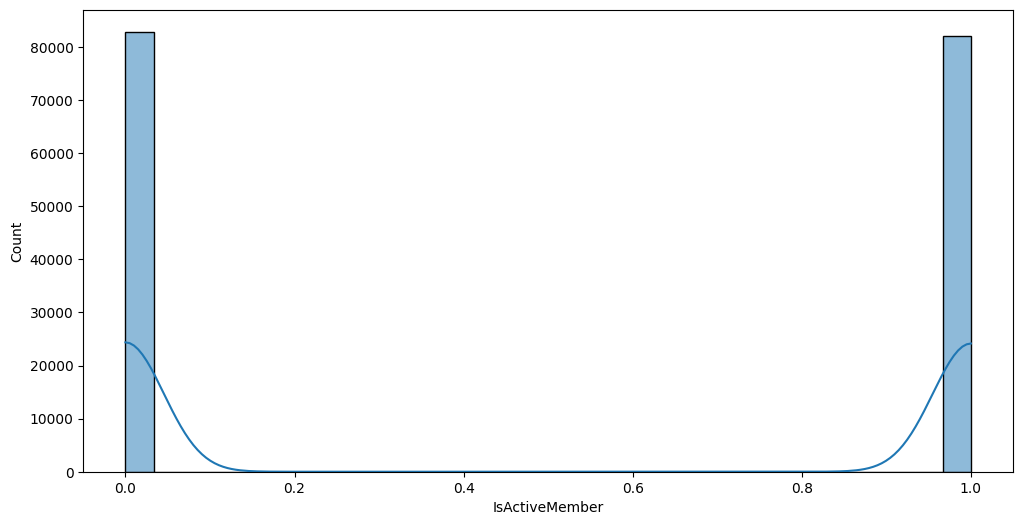

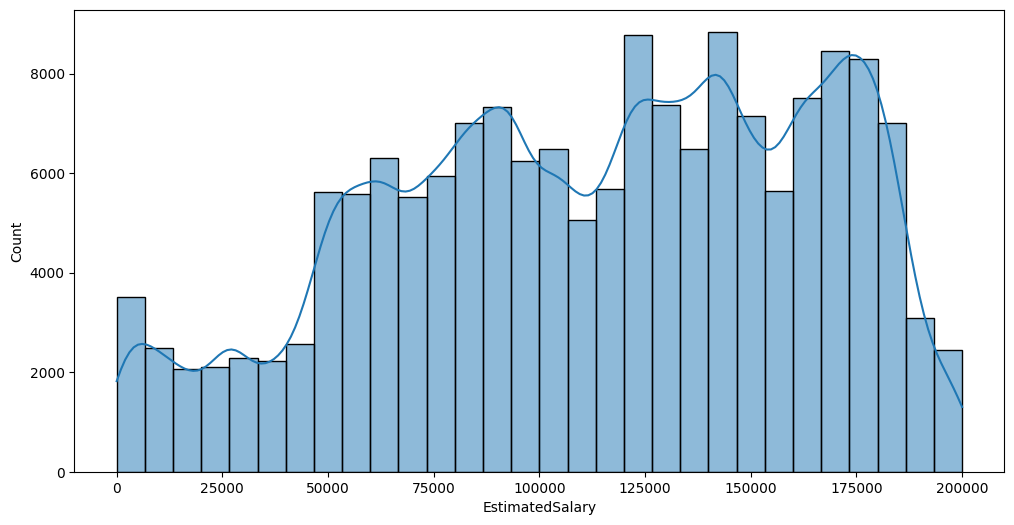

In [46]:
#plotting the distribution of the numerical features
for feature in num_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.show()

### Transformation of some features will definitely help in predicting

In [57]:
#those people which have a balance of 0 and are not active members
df_train[(df_train['Balance'] == 0) & (df_train['IsActiveMember'] == 0)]['Exited'].value_counts()

0    34104
1    10292
Name: Exited, dtype: int64

In [66]:
#percentage of people that have a balance of 0
len(df_train[df_train['Balance'] == 0])/len(df_train)*100

54.320927808815156

In [70]:
#those people which have a balance of 0 and are not active members
df_train[(df_train['Balance'] == 0)]['Exited'].value_counts()/len(df_train[df_train['Balance'] == 0])*100

0    83.834553
1    16.165447
Name: Exited, dtype: float64

In [72]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [61]:
num_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [62]:
continuous_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

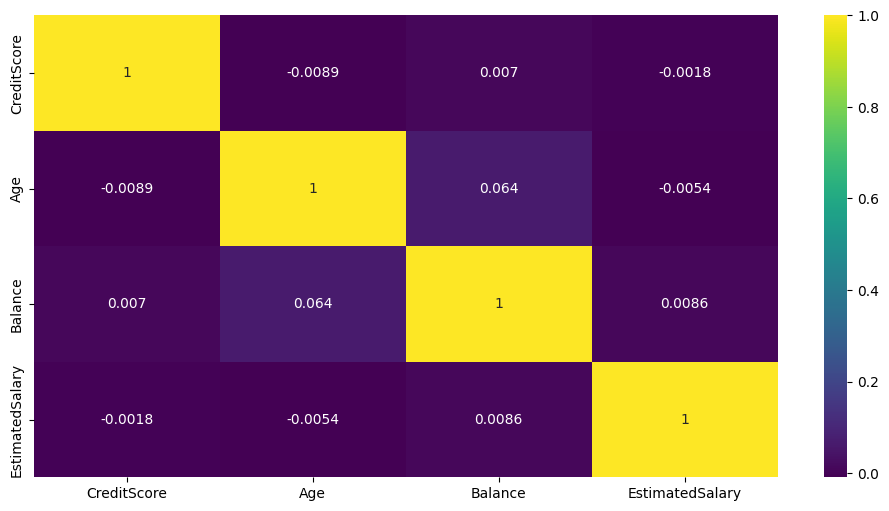

In [63]:
#determining correlation between numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(df_train[continuous_features].corr(), annot=True, cmap='viridis')
plt.show()

## Data Preprocessing

In [76]:
df_preprocessed = df_train.copy()
df_test_preprocessed = df_test.copy()

In [80]:
#scale then numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_preprocessed[continuous_features] = scaler.fit_transform(df_train[continuous_features])
df_test_preprocessed[continuous_features] = scaler.transform(df_test[continuous_features])


In [81]:
df_preprocessed.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,0.636,France,Male,0.202703,3,0.000000,2,1.0,0.0,0.907279,0
1,1,15749177,Okwudiliolisa,0.554,France,Male,0.202703,1,0.000000,2,1.0,1.0,0.247483,0
2,2,15694510,Hsueh,0.656,France,Male,0.297297,10,0.000000,2,1.0,0.0,0.924364,0
3,3,15741417,Kao,0.462,France,Male,0.216216,2,0.593398,1,1.0,1.0,0.422787,0
4,4,15766172,Chiemenam,0.732,Spain,Male,0.202703,5,0.000000,2,1.0,1.0,0.075293,0


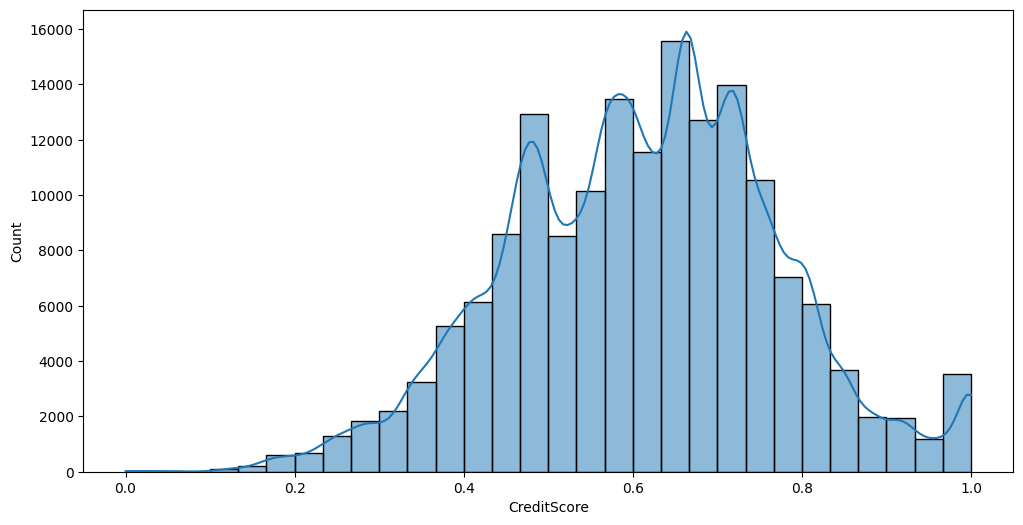

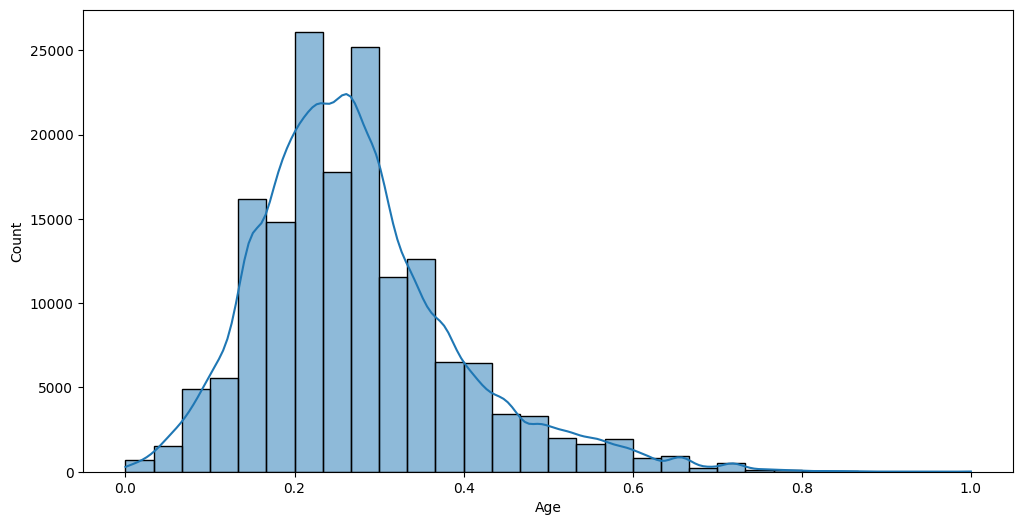

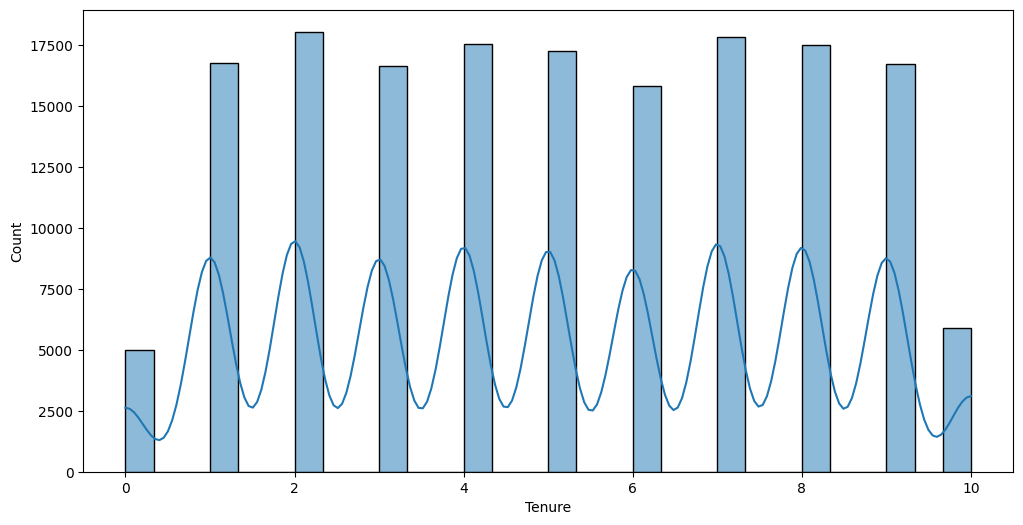

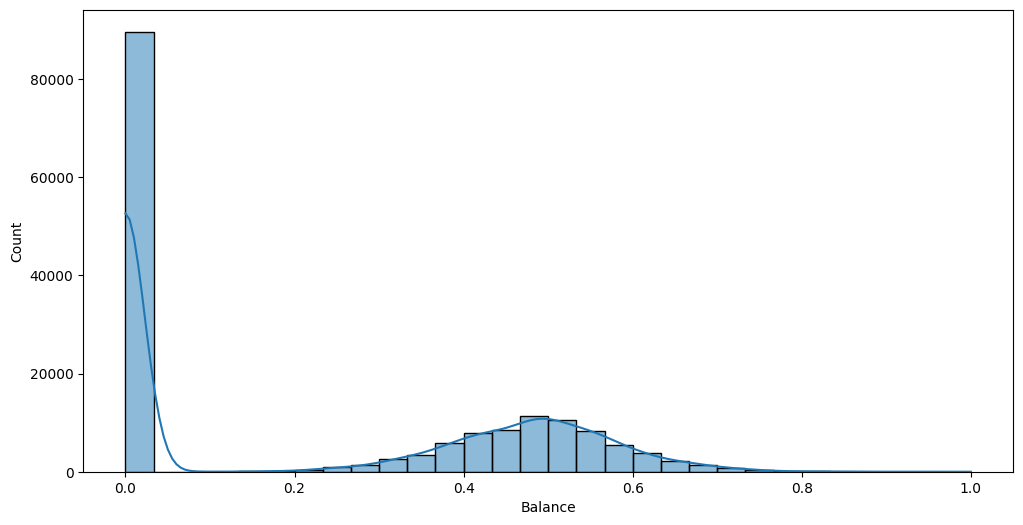

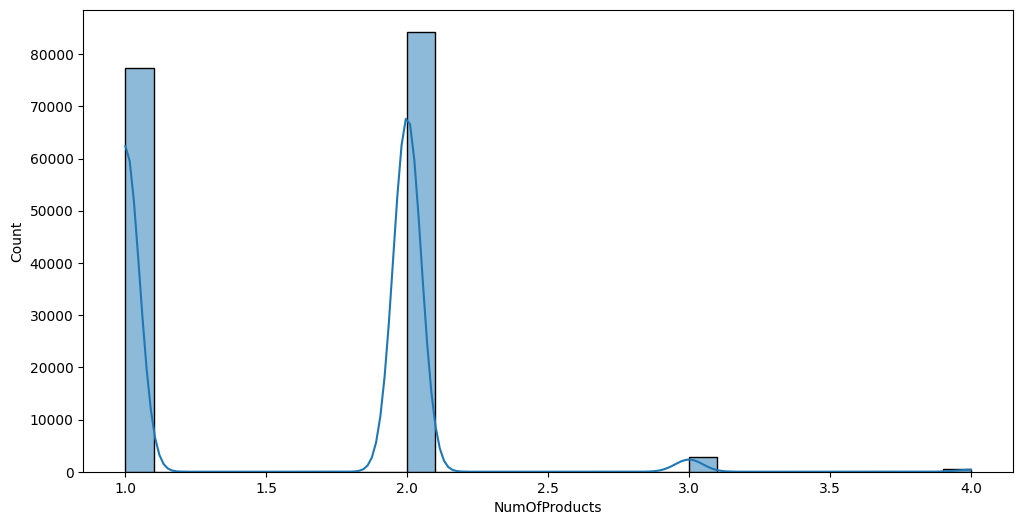

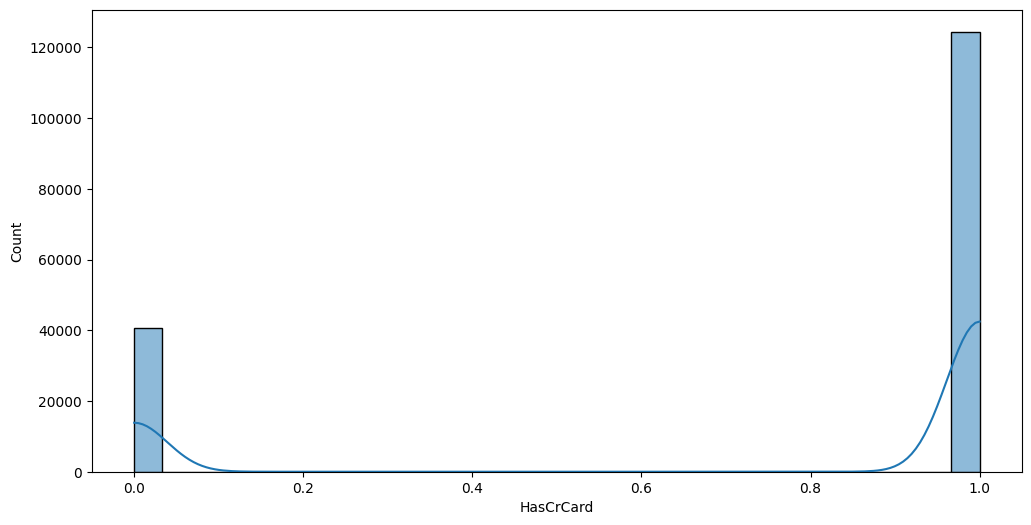

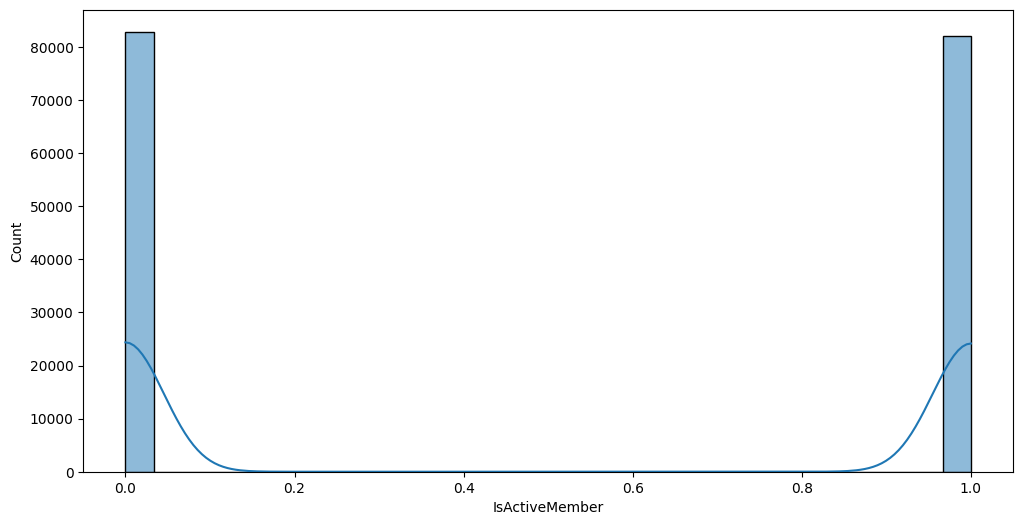

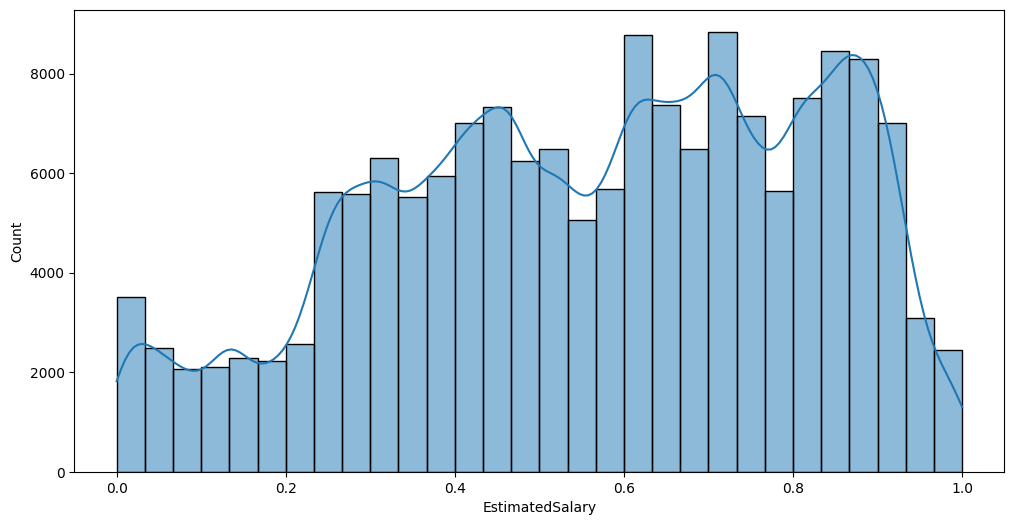

In [83]:
#plotting the distribution of the numerical features
for feature in num_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_preprocessed[feature], kde=True, bins=30)
    plt.show()

In [89]:
#add a feature hasZeroSalary
df_preprocessed['HasZeroBal'] = (df_preprocessed['Balance'] == 0).astype(int)

In [90]:
df_test_preprocessed['HasZeroBal'] = (df_test_preprocessed['Balance'] == 0).astype(int)

In [91]:
df_preprocessed.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasZeroBal
0,0,15674932,Okwudilichukwu,0.636,France,Male,0.202703,3,0.000000,2,1.0,0.0,0.907279,0,1
1,1,15749177,Okwudiliolisa,0.554,France,Male,0.202703,1,0.000000,2,1.0,1.0,0.247483,0,1
2,2,15694510,Hsueh,0.656,France,Male,0.297297,10,0.000000,2,1.0,0.0,0.924364,0,1
3,3,15741417,Kao,0.462,France,Male,0.216216,2,0.593398,1,1.0,1.0,0.422787,0,0
4,4,15766172,Chiemenam,0.732,Spain,Male,0.202703,5,0.000000,2,1.0,1.0,0.075293,0,1


In [2]:
df_preprocessed = pd.read_csv('train_preprocessed.csv')
df_test_preprocessed = pd.read_csv('test_preprocessed.csv')

In [3]:
#convert variables like HasCrCard, IsActiveMember to integers instead of float
df_preprocessed['HasCrCard'] = df_preprocessed['HasCrCard'].astype(int)
df_preprocessed['IsActiveMember'] = df_preprocessed['IsActiveMember'].astype(int)

In [5]:
df_test_preprocessed['HasCrCard'] = df_test_preprocessed['HasCrCard'].astype(int)
df_test_preprocessed['IsActiveMember'] = df_test_preprocessed['IsActiveMember'].astype(int)

In [6]:
df_preprocessed.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasZeroBal
0,0,15674932,Okwudilichukwu,0.636,France,Male,0.202703,3,0.000000,2,1,0,0.907279,0,1
1,1,15749177,Okwudiliolisa,0.554,France,Male,0.202703,1,0.000000,2,1,1,0.247483,0,1
2,2,15694510,Hsueh,0.656,France,Male,0.297297,10,0.000000,2,1,0,0.924364,0,1
3,3,15741417,Kao,0.462,France,Male,0.216216,2,0.593398,1,1,1,0.422787,0,0
4,4,15766172,Chiemenam,0.732,Spain,Male,0.202703,5,0.000000,2,1,1,0.075293,0,1


In [7]:
#one hot encoding the variables like geography, gender
df_preprocessed = pd.get_dummies(df_preprocessed, columns = ['Geography', 'Gender'], drop_first=True)
df_test_preprocessed = pd.get_dummies(df_test_preprocessed, columns = ['Geography', 'Gender'], drop_first=True)

In [8]:
df_preprocessed.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasZeroBal,Geography_Germany,Geography_Spain,Gender_Male
0,0,15674932,Okwudilichukwu,0.636,0.202703,3,0.000000,2,1,0,0.907279,0,1,0,0,1
1,1,15749177,Okwudiliolisa,0.554,0.202703,1,0.000000,2,1,1,0.247483,0,1,0,0,1
2,2,15694510,Hsueh,0.656,0.297297,10,0.000000,2,1,0,0.924364,0,1,0,0,1
3,3,15741417,Kao,0.462,0.216216,2,0.593398,1,1,1,0.422787,0,0,0,0,1
4,4,15766172,Chiemenam,0.732,0.202703,5,0.000000,2,1,1,0.075293,0,1,0,1,1


In [9]:
df_test_preprocessed.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,HasZeroBal,Geography_Germany,Geography_Spain,Gender_Male
0,165034,15773898,Lucchese,0.472,0.067568,2,0.000000,2,0,1,0.804903,1,0,0,0
1,165035,15782418,Nott,0.666,0.378378,2,0.000000,1,1,0,0.362723,1,0,0,0
2,165036,15807120,K?,0.612,0.216216,7,0.000000,2,1,0,0.694419,1,0,0,0
3,165037,15808905,O'Donnell,0.662,0.243243,8,0.000000,1,1,0,0.569654,1,0,0,1
4,165038,15607314,Higgins,0.804,0.270270,10,0.483318,1,1,0,0.697164,0,1,0,1


In [10]:
df_preprocessed_transformed = df_preprocessed.copy() 
df_test_preprocessed_transformed = df_test_preprocessed.copy()

In [11]:
#box-cox transform the variable like estimated salary, age, credit score
features_to_transform = ['EstimatedSalary', 'Age', 'CreditScore']
from scipy.stats import boxcox 
for feature in features_to_transform:
    df_preprocessed_transformed[feature] = boxcox(df_preprocessed_transformed[feature] + 1)[0]
    df_test_preprocessed_transformed[feature] = boxcox(df_test_preprocessed_transformed[feature] + 1)[0]



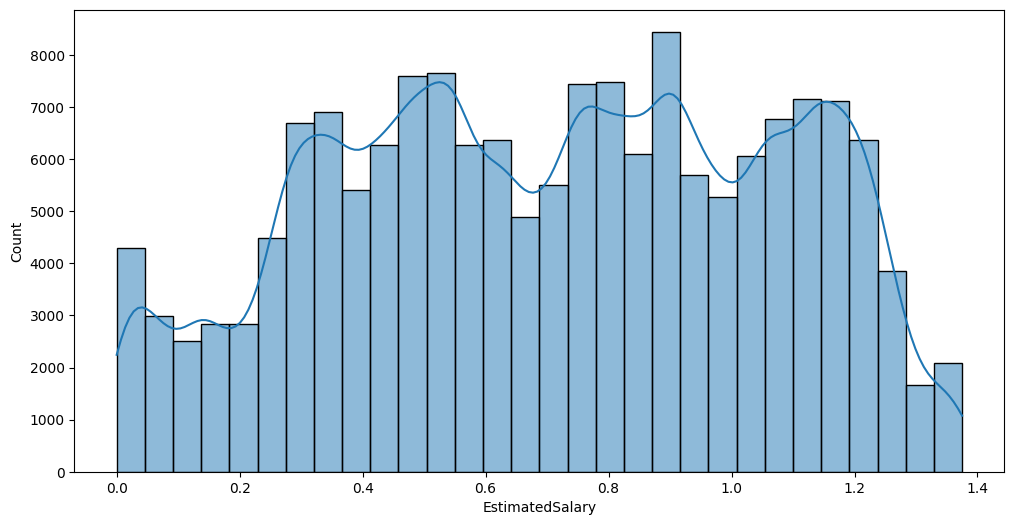

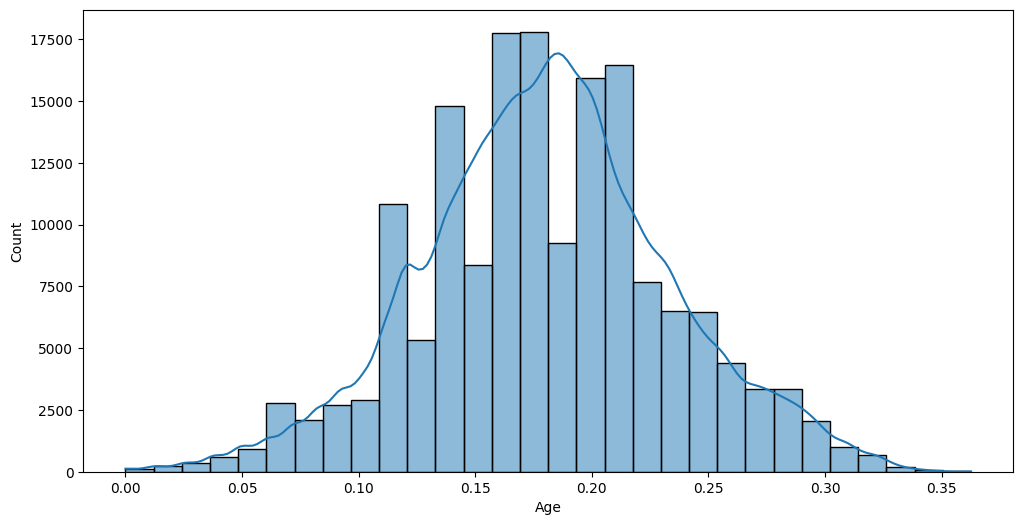

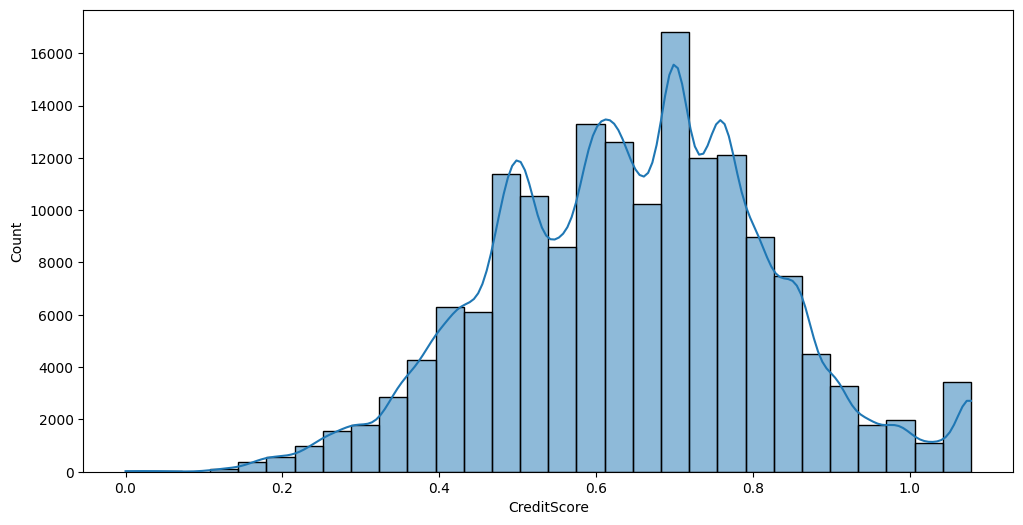

In [13]:
#check the distribution now of the transformed features
for feature in features_to_transform:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_preprocessed_transformed[feature], kde=True, bins=30)
    plt.show()

In [14]:
#save the transformed data separately to preprocessed
df_preprocessed_transformed.to_csv('train_preprocessed_transformed.csv', index=False)
df_test_preprocessed_transformed.to_csv('test_preprocessed_transformed.csv', index=False)

In [15]:
#save the preprocessed data
df_preprocessed.to_csv('train_preprocessed.csv', index=False)
df_test_preprocessed.to_csv('test_preprocessed.csv', index=False)